Segmentación del Problema:

En este proyecto, tras realizar un EDA preliminar con todos los datos obtenidos, hemos decidido segmentar el conjunto de datos de viajes ocasionales en Chile para enfocarnos en el "segmento intermedio" de comunas (25% > Total de Viajes Ocasionales < 75%). Esta decisión se basa en la observación de que el conjunto de datos contiene una gran diversidad entre las comunas, con algunas alcanzando volúmenes muy altos de viajes y otras significativamente bajos. Este desequilibrio puede dificultar el desarrollo de un modelo de predicción generalizado, ya que las comunas con muy pocos viajes no tienen suficientes datos para entrenar un modelo robusto, mientras que las de muy alto volumen podrían dominar el proceso de aprendizaje.

Al concentrarnos en las comunas intermedias, buscamos un equilibrio en la distribución de los datos, lo que permite entrenar un modelo que pueda generalizar mejor para predicciones de viajes ocasionales más realistas en comunas con un comportamiento de viaje "promedio". Este enfoque, al segmentar el conjunto de datos según los niveles de viajes, permite una mejor precisión en la predicción para esas comunas intermedias, al reducir el ruido que podría ser causado por los extremos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')

df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,Alta,1061.580205,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,Alta,1061.580205,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,Alta,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2023,12,diciembre,17,Alta,833.567298,833.567298
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2023,12,diciembre,44,Alta,833.567298,833.567298
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,108,Alta,833.567298,833.567298
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,47,Alta,833.567298,833.567298


In [3]:
df.shape

(2952624, 20)

In [4]:
# Agrupación y suma de viajes ocasionales por Comuna de Origen
Total_viajes_comuna_o = df.groupby('Comuna Origen')['Viajes Ocasionales'].sum().reset_index()

# Agrupación y suma de viajes ocasionales por Comuna de Destino
Total_viajes_comuna_d = df.groupby('Comuna Destino')['Viajes Ocasionales'].sum().reset_index()

# Obtener las columnas únicas de 'Comuna Origen' y 'Region Destino'
comuna_region_o = df[['Comuna Origen', 'Region Origen']].drop_duplicates()
comuna_region_d = df[['Comuna Destino', 'Region Destino']].drop_duplicates()

# Unir los resultados de la suma con la columna de Región correspondiente
Total_viajes_comuna_o = pd.merge(Total_viajes_comuna_o, comuna_region_o, on='Comuna Origen', how='left')
Total_viajes_comuna_d = pd.merge(Total_viajes_comuna_d, comuna_region_d, on='Comuna Destino', how='left')

Total_viajes_comuna_o = Total_viajes_comuna_o[['Region Origen','Comuna Origen','Viajes Ocasionales']]
Total_viajes_comuna_d = Total_viajes_comuna_d[['Region Destino','Comuna Destino','Viajes Ocasionales']]

In [5]:
# Agrupar y calcular el total de Viajes Ocasionales por comuna destino/ origen

Total_viajes_comuna_o = df.groupby('Comuna Origen')['Viajes Ocasionales'].sum().reset_index()
Total_viajes_comuna_d = df.groupby('Comuna Destino')['Viajes Ocasionales'].sum().reset_index()

Total_viajes_comuna_d

,Comuna Destino,Viajes Ocasionales
0,Aisén,235387
1,Algarrobo,2951489
2,Alhué,53523
3,Alto Biobío,96662
4,Alto Hospicio,206725
...,...,...
340,Yumbel,584397
341,Yungay,293978
342,Zapallar,1187776
343,Ñiquén,299485


In [6]:
# Calcular el porcentaje de viajes para cada comuna

Total_viajes_comuna_o['Porcentaje'] = (Total_viajes_comuna_o['Viajes Ocasionales'] / Total_viajes_comuna_o['Viajes Ocasionales'].sum()) * 100
Total_viajes_comuna_d['Porcentaje'] = (Total_viajes_comuna_d['Viajes Ocasionales'] / Total_viajes_comuna_d['Viajes Ocasionales'].sum()) * 100

# Ordenar por 'Porcentaje' en orden descendente

Total_viajes_comuna_o = Total_viajes_comuna_o.sort_values(by='Porcentaje', ascending=False)
Total_viajes_comuna_d = Total_viajes_comuna_d.sort_values(by='Porcentaje', ascending=False)

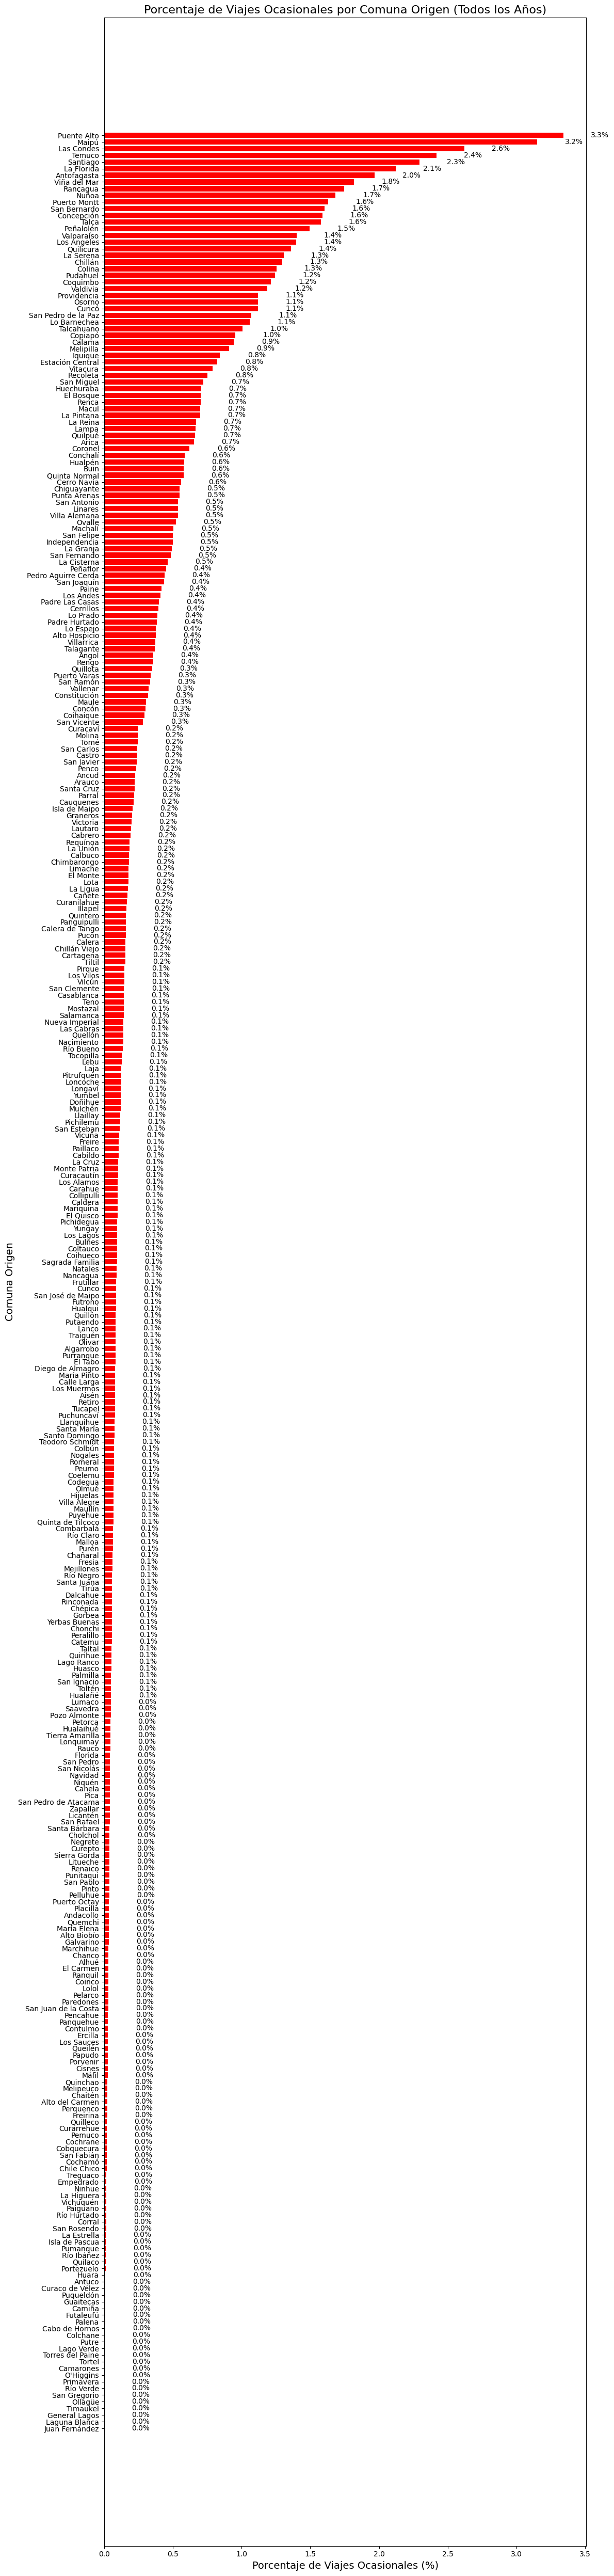

In [7]:
# Gráfico de barras Comunas Origen

plt.figure(figsize=(12, 50))

# Barras horizontales

bars = plt.barh(Total_viajes_comuna_o['Comuna Origen'], Total_viajes_comuna_o['Porcentaje'], color='red')

# Mayor valor de viajes esté en la parte superior

plt.gca().invert_yaxis()

# Agregar porcentajes al final de cada barra
for bar, porcentaje in zip(bars, Total_viajes_comuna_o['Porcentaje']):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{porcentaje:.1f}%', va='center', fontsize=10)


plt.title('Porcentaje de Viajes Ocasionales por Comuna Origen (Todos los Años)', fontsize=16)
plt.xlabel('Porcentaje de Viajes Ocasionales (%)', fontsize=14)
plt.ylabel('Comuna Origen', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# Máx Viajes Ocasionales y la comuna asociada
max_viajes = Total_viajes_comuna_o['Viajes Ocasionales'].max()
comuna_max = Total_viajes_comuna_o[Total_viajes_comuna_o['Viajes Ocasionales'] == max_viajes]['Comuna Origen'].iloc[0]

# Mín Viajes Ocasionales y la comuna asociada
min_viajes = Total_viajes_comuna_o['Viajes Ocasionales'].min()
comuna_min = Total_viajes_comuna_o[Total_viajes_comuna_o['Viajes Ocasionales'] == min_viajes]['Comuna Origen'].iloc[0]

# Media Viajes Ocasionales
media_viajes = Total_viajes_comuna_o['Viajes Ocasionales'].mean()

print(f"Max viajes ocasionales (Origen): {comuna_max} ({max_viajes} viajes)")
print(f"Min viajes ocasionales (Origen): {comuna_min} ({min_viajes} viajes)")
print(f"Media de los viajes ocasionales (Origen): {media_viajes:.2f} viajes")

Max viajes ocasionales (Origen): Puente Alto (5660656 viajes)
Min viajes ocasionales (Origen): Juan Fernández (709 viajes)
Media de los viajes ocasionales (Origen): 491012.14 viajes


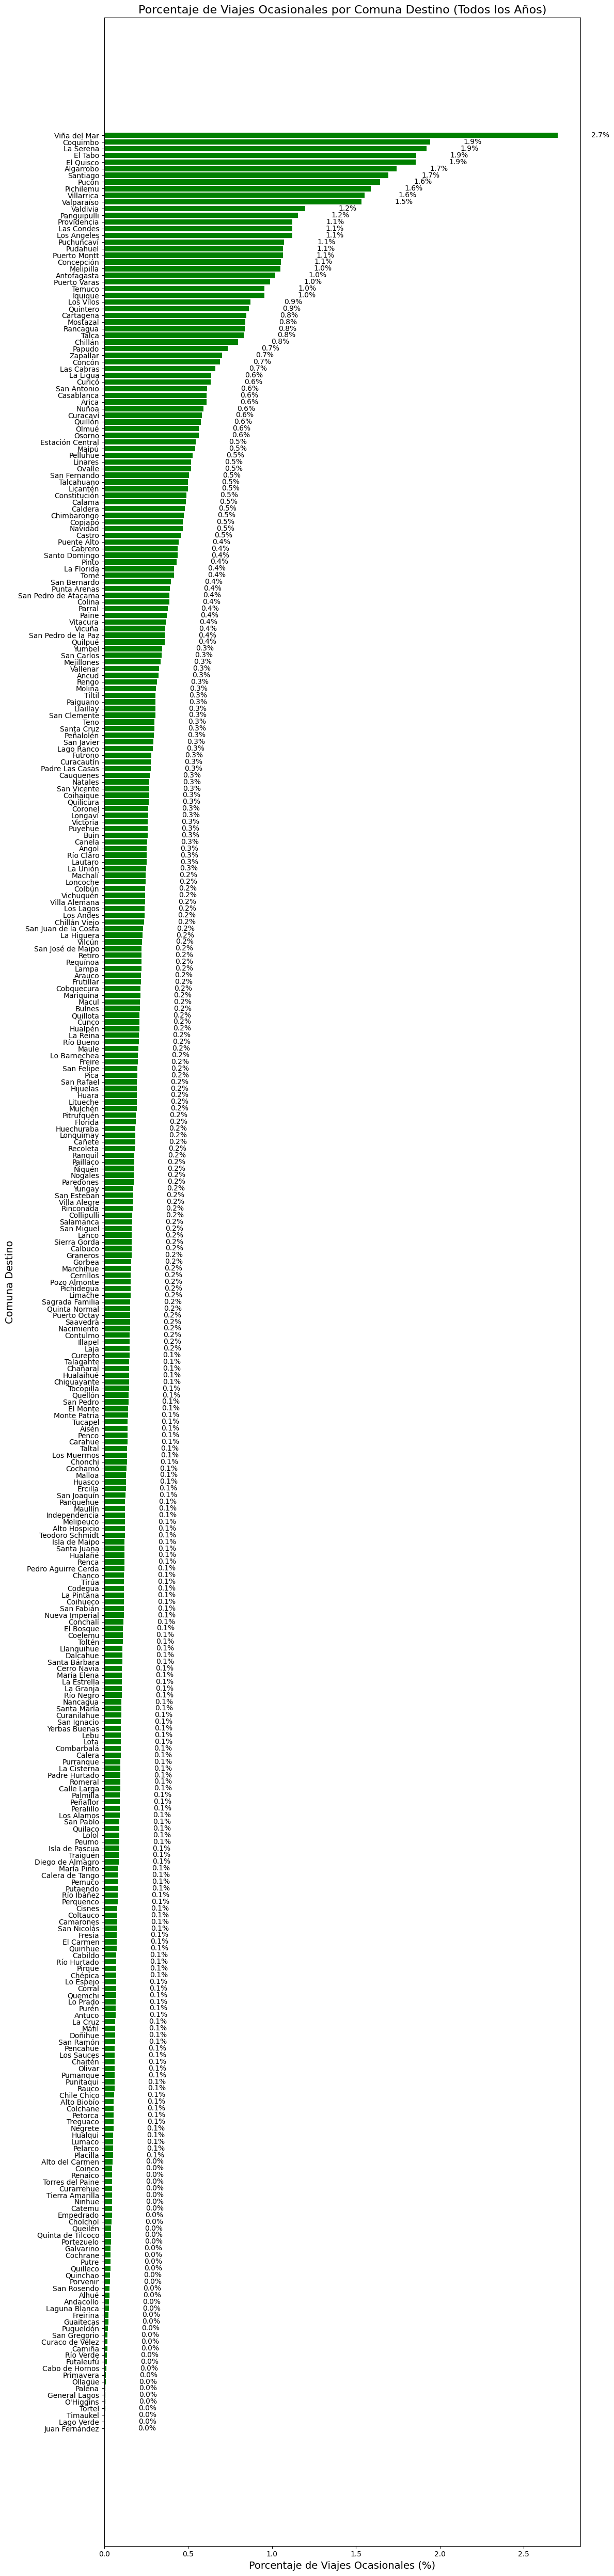

In [9]:
# Gráfico de barras Comunas Destino

plt.figure(figsize=(12, 50))

# Barras horizontales

bars = plt.barh(Total_viajes_comuna_d['Comuna Destino'], Total_viajes_comuna_d['Porcentaje'], color='green')

# Mayor valor de viajes esté en la parte superior

plt.gca().invert_yaxis()

# Agregar porcentajes al final de cada barra

for bar, porcentaje in zip(bars, Total_viajes_comuna_d['Porcentaje']):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{porcentaje:.1f}%', va='center', fontsize=10)


plt.title('Porcentaje de Viajes Ocasionales por Comuna Destino (Todos los Años)', fontsize=16)
plt.xlabel('Porcentaje de Viajes Ocasionales (%)', fontsize=14)
plt.ylabel('Comuna Destino', fontsize=14)
plt.tight_layout()
plt.show()

In [10]:
# Máx Viajes Ocasionales y la comuna asociada
max_viajes = Total_viajes_comuna_d['Viajes Ocasionales'].max()
comuna_max = Total_viajes_comuna_d[Total_viajes_comuna_d['Viajes Ocasionales'] == max_viajes]['Comuna Destino'].iloc[0]

# Mín Viajes Ocasionales y la comuna asociada
min_viajes = Total_viajes_comuna_d['Viajes Ocasionales'].min()
comuna_min = Total_viajes_comuna_d[Total_viajes_comuna_d['Viajes Ocasionales'] == min_viajes]['Comuna Destino'].iloc[0]

# Media Viajes Ocasionales
media_viajes = Total_viajes_comuna_d['Viajes Ocasionales'].mean()

print(f"Max viajes ocasionales (Destino): {comuna_max} ({max_viajes} viajes)")
print(f"Min viajes ocasionales (Destino): {comuna_min} ({min_viajes} viajes)")
print(f"Media de los viajes ocasionales (Destino): {media_viajes:.2f} viajes")

Max viajes ocasionales (Destino): Viña del Mar (4577682 viajes)
Min viajes ocasionales (Destino): Juan Fernández (894 viajes)
Media de los viajes ocasionales (Destino): 491012.14 viajes


In [11]:
# Calcular percentiles 25% y 75% de los viajes
percentil_25 = Total_viajes_comuna_d['Viajes Ocasionales'].quantile(0.25)
percentil_75 = Total_viajes_comuna_d['Viajes Ocasionales'].quantile(0.75)

print(f'Percentil 25: {percentil_25} \nPercentil 75: {percentil_75}')

Percentil 25: 147677.0 
Percentil 75: 514782.0


In [12]:
Total_viajes_comuna_d[[]]

""
338
68
125
86
85
...
185
323
317
128


In [13]:
# Comunas a Dropear < 25%
Total_viajes_comuna_d_drop25 = Total_viajes_comuna_d[Total_viajes_comuna_d['Viajes Ocasionales'] < percentil_25]
Total_viajes_comuna_d_drop25

,Comuna Destino,Viajes Ocasionales,Porcentaje
80,Diego de Almagro,146297,0.086362
166,María Pinto,142372,0.084045
22,Calera de Tango,140574,0.082984
206,Pemuco,140132,0.082723
240,Putaendo,139767,0.082507
...,...,...,...
185,O'Higgins,9929,0.005861
323,Tortel,8790,0.005189
317,Timaukel,6360,0.003754
128,Lago Verde,5061,0.002988


In [14]:
# Comunas a Dropear > 75%
Total_viajes_comuna_d_drop75 = Total_viajes_comuna_d[Total_viajes_comuna_d['Viajes Ocasionales'] > percentil_75]
Total_viajes_comuna_d_drop75

,Comuna Destino,Viajes Ocasionales,Porcentaje
338,Viña del Mar,4577682,2.702305
68,Coquimbo,3289337,1.941767
125,La Serena,3254490,1.921196
86,El Tabo,3149949,1.859483
85,El Quisco,3142294,1.854964
...,...,...,...
6,Ancud,547491,0.323196
263,Rengo,533527,0.314953
172,Molina,521751,0.308001
316,Tiltil,516802,0.305079


In [15]:
# Filtrado de DataFrame Rango Intermedio
df_filtrado = Total_viajes_comuna_d[(Total_viajes_comuna_d['Viajes Ocasionales'] >= percentil_25) & 
                                    (Total_viajes_comuna_d['Viajes Ocasionales'] <= percentil_75)]

df_filtrado

,Comuna Destino,Viajes Ocasionales,Porcentaje
141,Llaillay,514782,0.303887
280,San Clemente,514665,0.303818
313,Teno,507265,0.299449
302,Santa Cruz,505475,0.298393
214,Peñalolén,503510,0.297233
...,...,...,...
246,Quilaco,150639,0.088925
146,Lolol,150563,0.088881
212,Peumo,149899,0.088489
114,Isla de Pascua,149046,0.087985


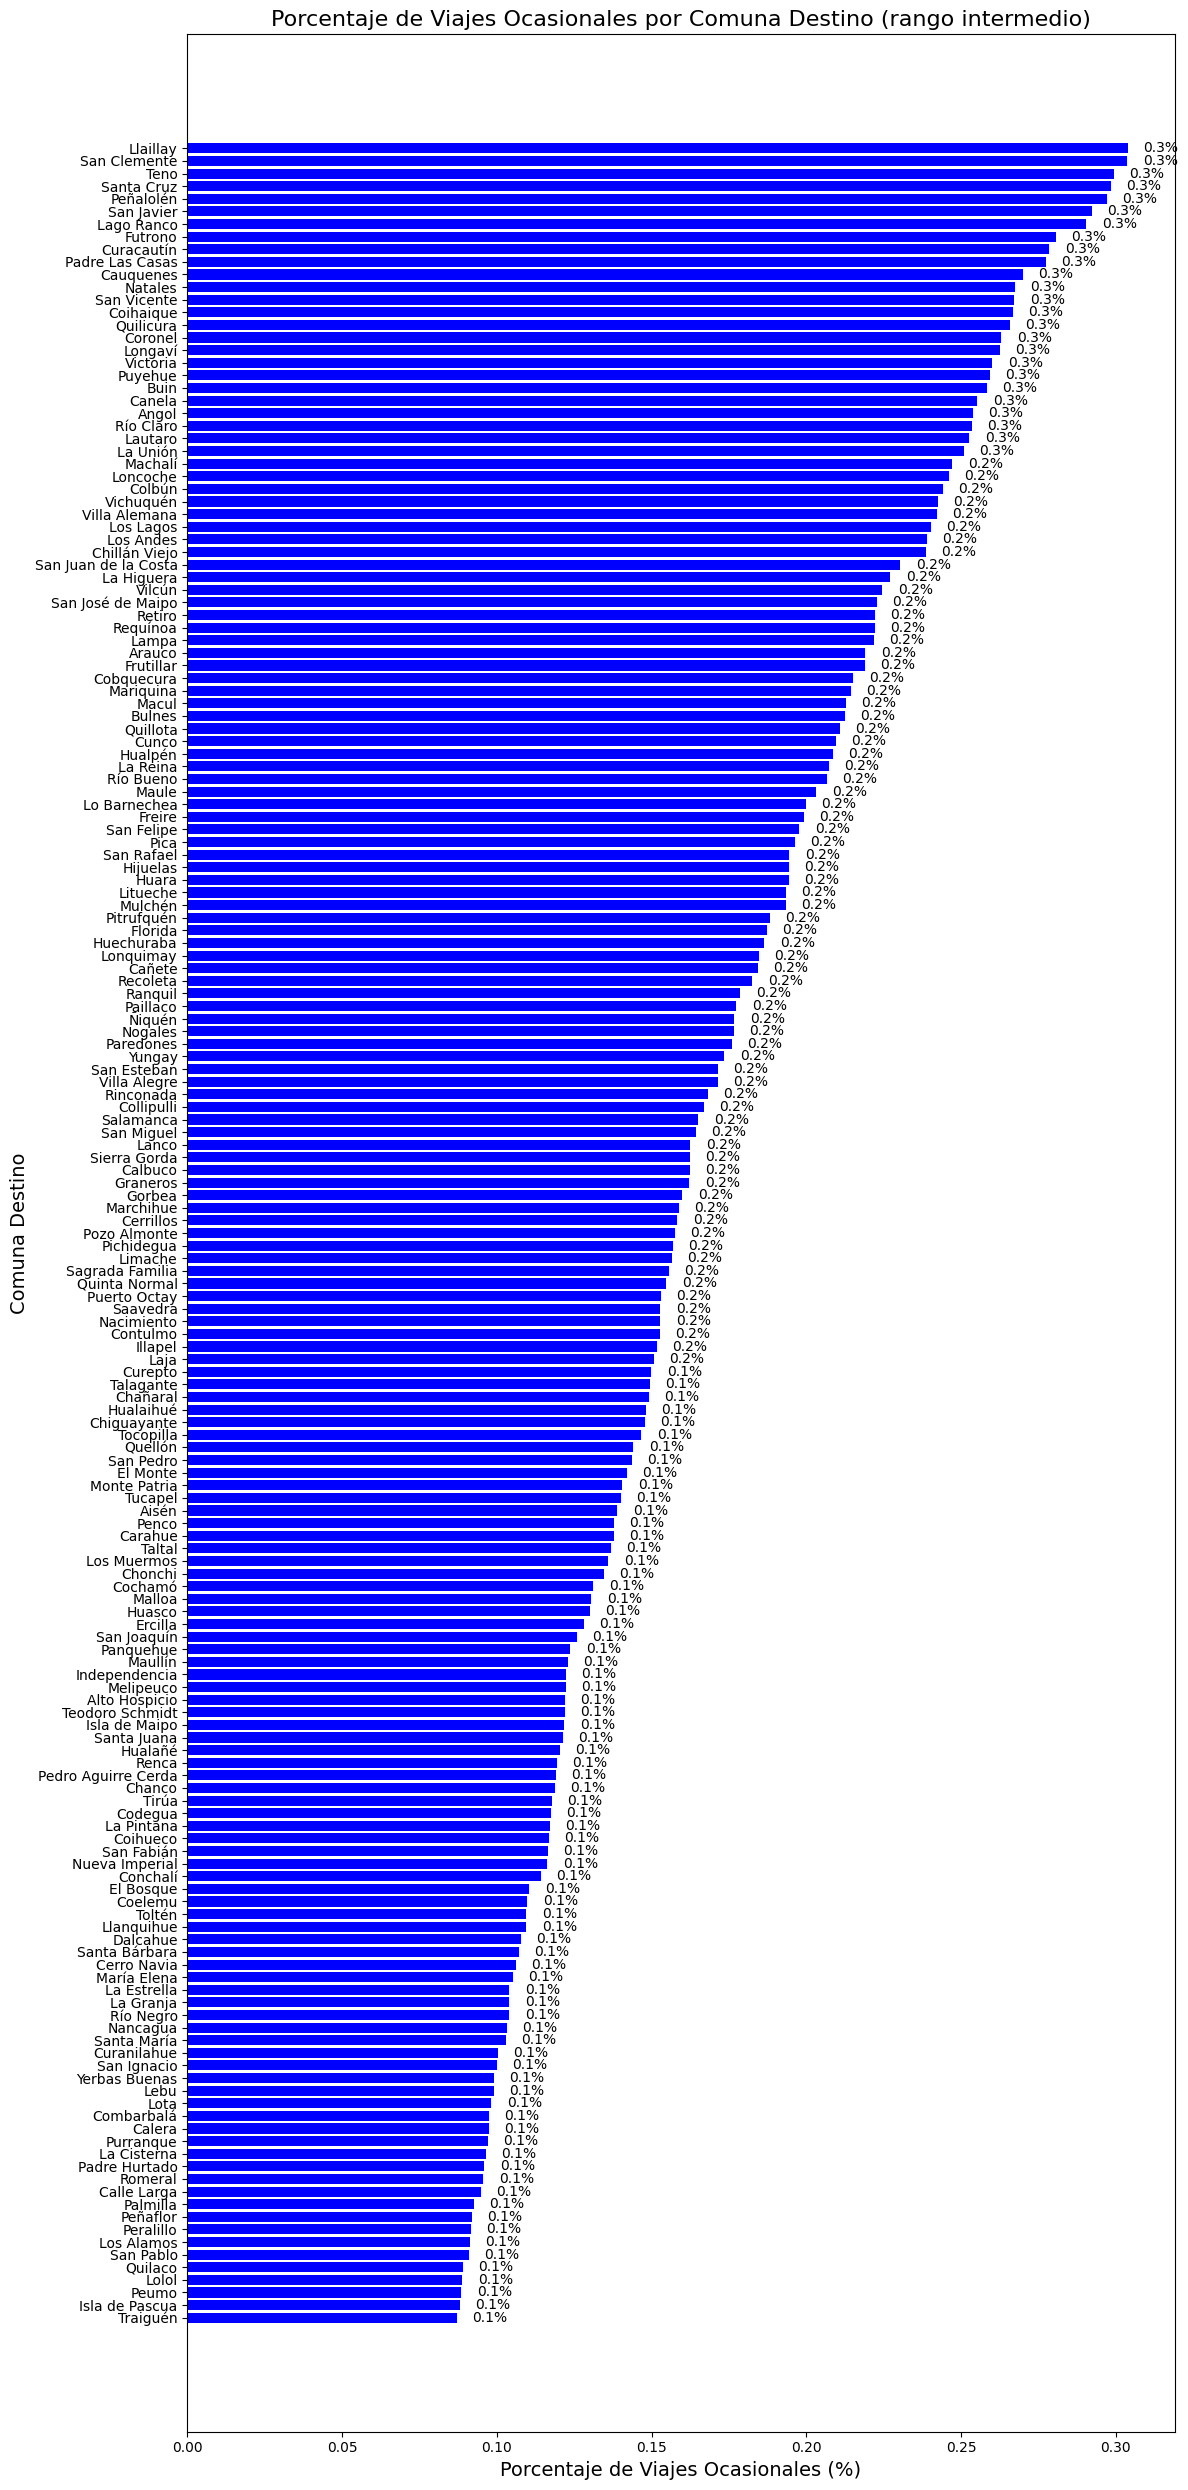

In [16]:
# Gráfico de barras Comunas Destino (Rango intermedio)

plt.figure(figsize=(12, 25))

# Barras horizontales

bars = plt.barh(df_filtrado['Comuna Destino'], df_filtrado['Porcentaje'], color='blue')

# Mayor valor esté en la parte superior

plt.gca().invert_yaxis()

# Agregar porcentajes al final de cada barra
for bar, porcentaje in zip(bars, df_filtrado['Porcentaje']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{porcentaje:.1f}%', va='center', fontsize=10)


plt.title('Porcentaje de Viajes Ocasionales por Comuna Destino (rango intermedio)', fontsize=16)
plt.xlabel('Porcentaje de Viajes Ocasionales (%)', fontsize=14)
plt.ylabel('Comuna Destino', fontsize=14)
plt.tight_layout()
plt.show()

In [17]:
# Lista de comunas en el rango intermedio
comunas_intermedio = df_filtrado['Comuna Destino'].unique()

print(f'Cantidad de Comunas: {len(comunas_intermedio)} \n\nComunas: {comunas_intermedio}')

Cantidad de Comunas: 173 

Comunas: ['Llaillay' 'San Clemente' 'Teno' 'Santa Cruz' 'Peñalolén' 'San Javier'
 'Lago Ranco' 'Futrono' 'Curacautín' 'Padre Las Casas' 'Cauquenes'
 'Natales' 'San Vicente' 'Coihaique' 'Quilicura' 'Coronel' 'Longaví'
 'Victoria' 'Puyehue' 'Buin' 'Canela' 'Angol' 'Río Claro' 'Lautaro'
 'La Unión' 'Machalí' 'Loncoche' 'Colbún' 'Vichuquén' 'Villa Alemana'
 'Los Lagos' 'Los Andes' 'Chillán Viejo' 'San Juan de la Costa'
 'La Higuera' 'Vilcún' 'San José de Maipo' 'Retiro' 'Requínoa' 'Lampa'
 'Arauco' 'Frutillar' 'Cobquecura' 'Mariquina' 'Macul' 'Bulnes' 'Quillota'
 'Cunco' 'Hualpén' 'La Reina' 'Río Bueno' 'Maule' 'Lo Barnechea' 'Freire'
 'San Felipe' 'Pica' 'San Rafael' 'Hijuelas' 'Huara' 'Litueche' 'Mulchén'
 'Pitrufquén' 'Florida' 'Huechuraba' 'Lonquimay' 'Cañete' 'Recoleta'
 'Ranquil' 'Paillaco' 'Ñiquén' 'Nogales' 'Paredones' 'Yungay'
 'San Esteban' 'Villa Alegre' 'Rinconada' 'Collipulli' 'Salamanca'
 'San Miguel' 'Lanco' 'Sierra Gorda' 'Calbuco' 'Graneros' 'Gor

In [18]:
df_original_intermedio = df[df['Comuna Destino'].isin(comunas_intermedio)]

df_original_intermedio

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205,1061.580205
6,1101,Iquique,11,Iquique,1,Tarapacá,2103,Sierra Gorda,Resto región Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,70,Alta,1061.580205,3724.530431
7,1101,Iquique,11,Iquique,1,Tarapacá,2104,Taltal,Taltal,21,Antofagasta,2,Antofagasta,2019,1,enero,106,Alta,1061.580205,3724.530431
10,1101,Iquique,11,Iquique,1,Tarapacá,2301,Tocopilla,Tocopilla,23,Tocopilla,2,Antofagasta,2019,1,enero,457,Alta,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952618,16305,San Nicolás,163,Punilla,16,Ñuble,16202,Cobquecura,Cobquecura,162,Itata,16,Ñuble,2023,12,diciembre,96,Alta,833.567298,833.567298
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2023,12,diciembre,17,Alta,833.567298,833.567298
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,108,Alta,833.567298,833.567298
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,47,Alta,833.567298,833.567298


In [19]:
# Comprobación 
total_comunas_unicas_1 = df['Comuna Destino'].nunique()
total_comunas_unicas_2 = df_original_intermedio['Comuna Destino'].nunique()
total_comunas_unicas_3 = df_filtrado['Comuna Destino'].nunique()

print(total_comunas_unicas_1)
print(total_comunas_unicas_2)
print(total_comunas_unicas_3)

345
173
173


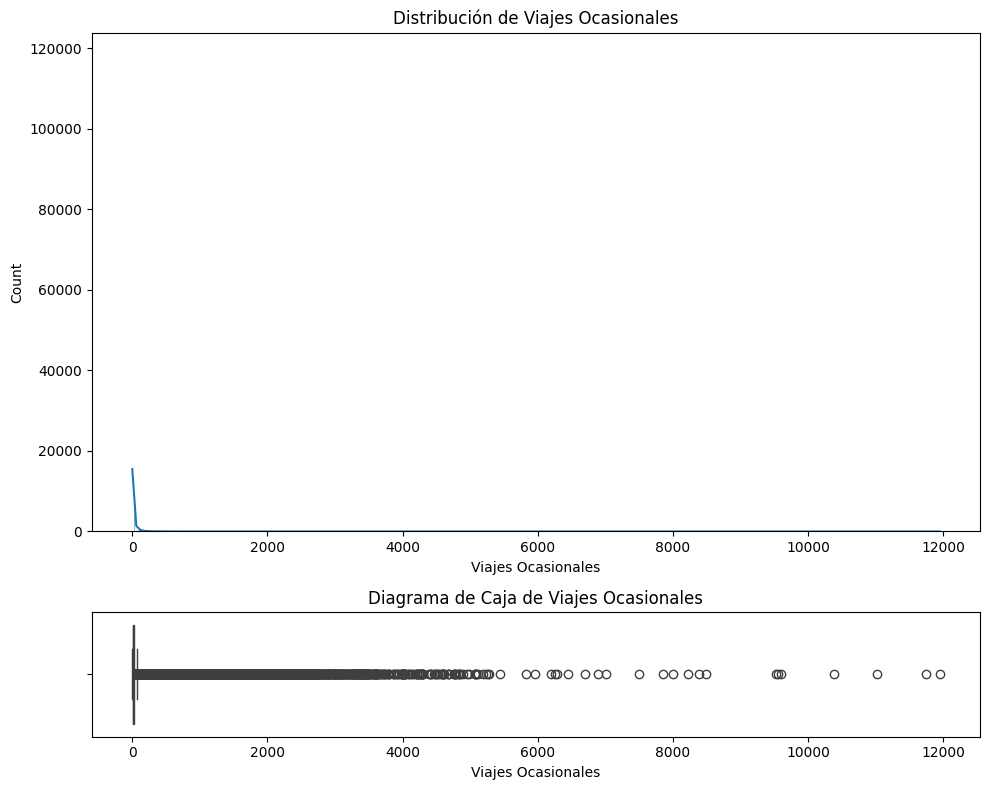

In [20]:
import seaborn as sns 

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df_original_intermedio, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df_original_intermedio, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [21]:
# Guardar DateFrame
df_original_intermedio.to_csv('../data/processed/df_listo_para_eda_rango_intermedio.csv', sep=';', index=False)